In [1]:
import pandas as pd

In [4]:
data=pd.read_csv('./2021_ICM_Problem_D_Data/influence_data.csv',encoding='gbk')

In [6]:
data.head()

influencer_id influencer_name influencer_main_genre  \
0         759491   The Exploited              Pop/Rock   
1          25462          Tricky            Electronic   
2          66915       Bob Dylan              Pop/Rock   
3          71209   Leonard Cohen              Pop/Rock   
4          91438    The Gun Club              Pop/Rock   

   influencer_active_start  follower_id   follower_name follower_main_genre  \
0                     1980           74  Special Duties            Pop/Rock   
1                     1990          335       PJ Harvey            Pop/Rock   
2                     1960          335       PJ Harvey            Pop/Rock   
3                     1950          335       PJ Harvey            Pop/Rock   
4                     1980          335       PJ Harvey            Pop/Rock   

   follower_active_start  
0                   1980  
1                   1990  
2                   1990  
3                   1990  
4                   1990

In [7]:
from bs4 import BeautifulSoup
import string
import pandas as pd 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [17]:
import networkx as nx  
import matplotlib.pyplot as plt

In [157]:
G=nx.DiGraph()

# 制作networkx数据

In [12]:
for line in data.iterrows():
    print(line[1])
    break

influencer_id                      759491
influencer_name             The Exploited
influencer_main_genre            Pop/Rock
influencer_active_start              1980
follower_id                            74
follower_name              Special Duties
follower_main_genre              Pop/Rock
follower_active_start                1980
Name: 0, dtype: object


In [158]:
influencer=[]
follower=[]
for line in data.iterrows():
    influencer.append(line[1]['influencer_id'])
    follower.append(line[1]['follower_id'])


In [159]:
for i in range(len(influencer)):
    G.add_edge(influencer[i],follower[i])#此处有向图的指向是1指向2

## 测试part

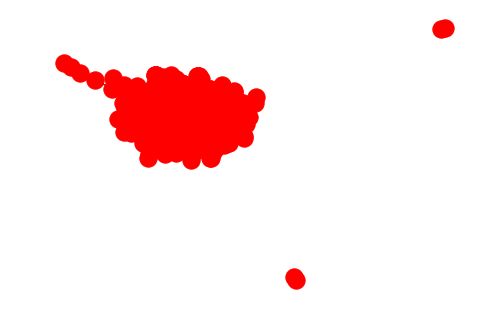

In [21]:
nx.draw(G) 

In [22]:
print("输出全部边的数量：{}".format(G.number_of_edges()))#networkx自动把重复的边去掉了

输出全部边的数量：42731


In [23]:
print("输出全部节点：{}".format(G.nodes()))

, 175459, 175525, 221894, 175538, 646353, 175579, 261087, 363100, 786360, 78242, 639697, 804706, 175992, 222974, 654543, 924780, 324819, 176083, 176148, 176256, 176332, 125528, 797670, 243812, 411830, 918600, 948061, 176360, 176859, 177117, 177336, 771792, 177372, 177588, 685751, 769876, 177856, 337119, 177957, 412134, 1292549, 178051, 185810, 611929, 947576, 784766, 178143, 943268, 178345, 178549, 933809, 178621, 178645, 142767, 178654, 216294, 424302, 491786, 178750, 178799, 179105, 179191, 279141, 179335, 179636, 179698, 179714, 180023, 180503, 180516, 319945, 524050, 230784, 800332, 823482, 893111, 181719, 181817, 182302, 370703, 785357, 516202, 532487, 183311, 183699, 183777, 187162, 834466, 184199, 791480, 837985, 184208, 825387, 184406, 184451, 184471, 329883, 185155, 185383, 798113, 308762, 185440, 185543, 185591, 846092, 849246, 185617, 185669, 185999, 186096, 186390, 186440, 668127, 186481, 187172, 756772, 187422, 636106, 264350, 188206, 188261, 67539, 636382, 848572, 188467,

In [24]:
p2=nx.shortest_path_length(G, source=2518003, target=2896351)  #最短路径长度
print('节点0到节点2的最短路径长度:',p2)

节点0到节点2的最短路径长度: 2


# 2014C重要度
！！此处有参考文献

## 度中心性
# 此处要用out_degree_ce()！！！！

In [25]:
deg=nx.degree(G)

## 介数中心性

In [29]:
bet=nx.betweenness_centrality(G)

## 紧密度中心性

In [30]:
clo=nx.closeness_centrality(G)

## max

In [75]:
maxclo_key=0
maxclo_value=0
for i in clo:
    if clo[i]>maxclo_value:
        maxclo_value=clo[i]
        maxclo_key=i

In [76]:
maxbet_key=0
maxbet_value=0
for i in bet:
    if bet[i]>maxbet_value:
        maxbet_value=bet[i]
        maxbet_key=i

In [77]:
maxdeg_key=0
maxdeg_value=0
for i in deg:
    if i[1]>maxdeg_value:
        maxdeg_value=i[1]
        maxdeg_key=i[0]

In [81]:
for i in bet:
    print(i)
    break

759491


# 每个人的向量


In [57]:
nodes=G.nodes()

In [89]:
arrays={}
for node in nodes:
    array=[]
    array.append(deg[node]/maxdeg_value)
    array.append(bet[node]/maxbet_value)
    array.append(clo[node]/maxclo_value)
    arrays[node]=array

In [92]:
idea_array=[1,1,0]

# 算距离

In [103]:
distances={}
for array in arrays:
    distance=np.square(arrays[array][0]-idea_array[0])+np.square(arrays[array][1]-idea_array[1])+np.square(arrays[array][2]-idea_array[2])
    distance=np.sqrt(distance)
    distances[array]=distance

In [99]:
for array in arrays:
    print(array)
    break

759491


In [105]:
maxdis_key=0
maxdis_value=0
for i in distances:
    if distances[i]>maxdis_value:
        maxdis_value=distances[i]
        maxdis_key=i

In [113]:
mindis_key=0
mindis_value=1.5427143363833393
for i in distances:
    if distances[i]<mindis_value:
        mindis_value=distances[i]
        mindis_key=i

In [114]:
mindis_value

1.0

In [115]:
maxdis_value

1.5985621583778193

# DS思路
samefield_inf_num:每个人的follewer数目
# 评价特征
+	重要性（ 出度中心性、介数中心性、紧密中心性）

这个参考14论文

+	所在领域竞争力（所在领域的艺术家人数，所在领域人数越多，影响力越大）

举例说明：同一水平的英文作家的影响力肯定比祖鲁语作家的影响力高，可以理解为作品类型本身的传播能力

+	所在领域年份人数

举例说明：百家争鸣时代的普通天才往往能在星光黯淡的时代大放异彩，可以理解为艺术在所在领域在艺术家活跃期间获取影响力的难度

+	所在领域年份影响力排名（先筛选出艺术家所在领域此年份的所有人，然后根据影响人数进行排名）（排名越小，影响力越大）

很直观的指标

+	所在年份竞争力（这一年份的所有领域的艺术家总人数）（竞争力越大，影响力越大）

艺术家瓜分影响力这块蛋糕的难度（45用相关性分析后续再决定选择）

+	当前年代追随者数目

直观

+	（非当前年代追随者数目）

艺术家在创作生涯结束后对未来时代的影响力衡量

+	追随者跨的领域数目

艺术家作品对非本领域艺术家的吸引程度，也可以说是艺术家作品所含的纯粹的艺术性的度量

## 每个人的follower数目

In [117]:
data.head()

influencer_id influencer_name influencer_main_genre  \
0         759491   The Exploited              Pop/Rock   
1          25462          Tricky            Electronic   
2          66915       Bob Dylan              Pop/Rock   
3          71209   Leonard Cohen              Pop/Rock   
4          91438    The Gun Club              Pop/Rock   

   influencer_active_start  follower_id   follower_name follower_main_genre  \
0                     1980           74  Special Duties            Pop/Rock   
1                     1990          335       PJ Harvey            Pop/Rock   
2                     1960          335       PJ Harvey            Pop/Rock   
3                     1950          335       PJ Harvey            Pop/Rock   
4                     1980          335       PJ Harvey            Pop/Rock   

   follower_active_start  
0                   1980  
1                   1990  
2                   1990  
3                   1990  
4                   1990

In [134]:
nodes=G.node()#可以遍历的对象unique
samefield_inf_num={}

In [146]:
for node in nodes:
    art_df=data[data['influencer_id']==node]
    if art_df.shape[0]>0:
        art_field=art_df['influencer_main_genre'].values[0]
        art_df_selected=art_df[art_df['follower_main_genre']==art_field]
        follower_num=art_df_selected.shape[0]
        samefield_inf_num[node]=follower_num
    else:
        samefield_inf_num[node]=0

## 各个领域的人数

## 祖宗节点seek

In [162]:
in_degree=G.in_degree()
out_degree=G.out_degree()

In [164]:
origin_node={}
for node in in_degree:
    if in_degree[node][1]==0:
        origin_node[node]=out_degree[node]

KeyError: (759491, 13)

In [168]:
in_degree[333766]

5

In [169]:
for j in in_degree:
    print(node)
    break

(759491, 13)
